In [255]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px   
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans


In [256]:
cattest = pd.read_csv('../Data/LJH_cattest.csv', index_col= 'Unnamed: 0')
catdata = pd.read_csv('../Data/LJH_catdata.csv' , index_col= 'Unnamed: 0')

In [257]:
catdata.head(5)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,Z,C,Commercial associate,Higher education,Married,Municipal apartment,B,E,Y,N,N,N,NaN,B,A,1.0
1,1,F,N,Y,O,D,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,B,C,Y,N,N,Y,Laborers,C,A,1.0
2,2,M,Y,Y,Z,D,Working,Higher education,Married,House / apartment,D,E,Y,N,Y,N,Managers,B,C,2.0
3,3,F,N,Y,Z,C,Commercial associate,Secondary / secondary special,Married,House / apartment,C,D,Y,N,Y,N,Sales staff,B,D,0.0
4,4,F,Y,Y,Z,B,State servant,Higher education,Married,House / apartment,C,D,Y,N,N,N,Managers,B,C,2.0


In [258]:
from sklearn.cluster import KMeans

catdata['occyp_type'] = catdata['occyp_type'].fillna('Secret')

subset = pd.crosstab(catdata['occyp_type'] , catdata['income_total'])
subset['Total'] = subset.sum(axis=1)

subset = subset.div(subset['Total'].values, axis = 0)
subset = subset.drop('Total', axis = 1)

kmeans = KMeans(n_clusters= 3)
kmeans.fit(subset)


KMeans(n_clusters=3)

In [259]:
catdata['occyp_type'].unique()

array(['Secret', 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [260]:
subset['job_cluster'] = kmeans.labels_

In [261]:
subset.loc[subset['job_cluster'] == 0].index

Index(['Accountants', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers',
       'Private service staff', 'Security staff'],
      dtype='object', name='occyp_type')

In [262]:
cattest['occyp_type'] = cattest['occyp_type'].fillna('Secret')

In [263]:
catdata['occyp_type'] = catdata['occyp_type'].replace(['Realty agents', 'Managers'], 'A')
catdata['occyp_type'] = catdata['occyp_type'].replace(['Cleaning staff' ,'Cooking staff' ,'Low-skill Laborers' ,'Medicine staff' ,'Sales staff' ,'Secretaries' ,'Waiters/barmen staff'] , 'B')
catdata['occyp_type'] = catdata['occyp_type'].replace('Secret', 'C')
catdata['occyp_type'] = catdata['occyp_type'].replace(['Accountants', 'Core staff', 'Drivers', 'HR staff','High skill tech staff', 'IT staff', 'Laborers','Private service staff', 'Security staff'] , 'D')

In [264]:
cattest['occyp_type'] = cattest['occyp_type'].replace(['Realty agents', 'Managers'], 'A')
cattest['occyp_type'] = cattest['occyp_type'].replace(['Cleaning staff' ,'Cooking staff' ,'Low-skill Laborers' ,'Medicine staff' ,'Sales staff' ,'Secretaries' ,'Waiters/barmen staff'] , 'B')
cattest['occyp_type'] = cattest['occyp_type'].replace('Secret', 'C')
cattest['occyp_type'] = cattest['occyp_type'].replace(['Accountants', 'Core staff', 'Drivers', 'HR staff','High skill tech staff', 'IT staff', 'Laborers','Private service staff', 'Security staff'] , 'D')

In [265]:
catdata['occyp_type'].value_counts()

D    11445
C     8171
B     4611
A     2230
Name: occyp_type, dtype: int64

In [266]:
cattest['occyp_type'].value_counts()

D    4200
C    3152
B    1787
A     861
Name: occyp_type, dtype: int64

In [267]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  object 
 5   income_total   26457 non-null  object 
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  object 
 11  DAYS_EMPLOYED  26457 non-null  object 
 12  FLAG_MOBIL     26457 non-null  object 
 13  work_phone     26457 non-null  object 
 14  phone          26457 non-null  object 
 15  email          26457 non-null  object 
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  object 
 18  begin_

In [268]:
cattest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          10000 non-null  int64 
 1   gender         10000 non-null  object
 2   car            10000 non-null  object
 3   reality        10000 non-null  object
 4   child_num      10000 non-null  object
 5   income_total   10000 non-null  object
 6   income_type    10000 non-null  object
 7   edu_type       10000 non-null  object
 8   family_type    10000 non-null  object
 9   house_type     10000 non-null  object
 10  DAYS_BIRTH     10000 non-null  object
 11  DAYS_EMPLOYED  10000 non-null  object
 12  FLAG_MOBIL     10000 non-null  object
 13  work_phone     10000 non-null  object
 14  phone          10000 non-null  object
 15  email          10000 non-null  object
 16  occyp_type     10000 non-null  object
 17  family_size    10000 non-null  object
 18  begin_month    10000 non-nu

In [269]:
catdata.shape, cattest.shape

((26457, 20), (10000, 19))

In [270]:
X_catdata = catdata.drop(['index', 'credit'], axis = 1)
y_catdata = catdata[['credit']]

In [271]:
X_cattest = cattest.drop('index', axis = 1)

In [272]:
X_catdata = pd.get_dummies(X_catdata, drop_first= 1)
X_cattest = pd.get_dummies(X_cattest, drop_first= 1)

In [273]:
print(X_catdata.shape,  X_cattest.shape, y_catdata.shape)

(26457, 47) (10000, 47) (26457, 1)


In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(X_catdata, y_catdata, 
                                                    stratify=y_catdata, test_size=0.25,
                                                    random_state = 2021)

In [276]:
from catboost import CatBoostClassifier

In [277]:
cat_pred=CatBoostClassifier(random_state=2021, learning_rate = 0.11, iterations = 530)
cat_pred.fit(X_train, y_train)
y_pred=cat_pred.predict_proba(X_val)
print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

0:	learn: 1.0519666	total: 156ms	remaining: 1m 22s
1:	learn: 1.0164966	total: 165ms	remaining: 43.4s
2:	learn: 0.9888584	total: 168ms	remaining: 29.6s
3:	learn: 0.9665071	total: 176ms	remaining: 23.1s
4:	learn: 0.9487676	total: 183ms	remaining: 19.2s
5:	learn: 0.9348481	total: 191ms	remaining: 16.7s
6:	learn: 0.9237364	total: 198ms	remaining: 14.8s
7:	learn: 0.9061546	total: 205ms	remaining: 13.4s
8:	learn: 0.8984930	total: 229ms	remaining: 13.2s
9:	learn: 0.8860626	total: 260ms	remaining: 13.5s
10:	learn: 0.8762119	total: 268ms	remaining: 12.7s
11:	learn: 0.8719837	total: 276ms	remaining: 11.9s
12:	learn: 0.8677935	total: 285ms	remaining: 11.3s
13:	learn: 0.8647688	total: 304ms	remaining: 11.2s
14:	learn: 0.8626112	total: 312ms	remaining: 10.7s
15:	learn: 0.8570089	total: 336ms	remaining: 10.8s
16:	learn: 0.8524890	total: 345ms	remaining: 10.4s
17:	learn: 0.8504925	total: 353ms	remaining: 10s
18:	learn: 0.8488188	total: 362ms	remaining: 9.73s
19:	learn: 0.8473437	total: 371ms	remainin

In [300]:
X_catdata.columns

Index(['gender_M', 'car_Y', 'reality_Y', 'child_num_O', 'child_num_T',
       'child_num_Z', 'income_total_B', 'income_total_C', 'income_total_D',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Student', 'income_type_Working',
       'edu_type_Higher education', 'edu_type_Incomplete higher',
       'edu_type_Lower secondary', 'edu_type_Secondary / secondary special',
       'family_type_Married', 'family_type_Separated',
       'family_type_Single / not married', 'family_type_Widow',
       'house_type_House / apartment', 'house_type_Municipal apartment',
       'house_type_Office apartment', 'house_type_Rented apartment',
       'house_type_With parents', 'DAYS_BIRTH_B', 'DAYS_BIRTH_C',
       'DAYS_BIRTH_D', 'DAYS_BIRTH_E', 'DAYS_EMPLOYED_B', 'DAYS_EMPLOYED_C',
       'DAYS_EMPLOYED_D', 'DAYS_EMPLOYED_E', 'work_phone_Y', 'phone_Y',
       'email_Y', 'occyp_type_B', 'occyp_type_C', 'occyp_type_D',
       'family_size_B', 'family_size_C', 'family_size_

In [279]:
y_pred_=cat_pred.predict(X_val)
y_pred_

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [1.],
       [2.]])

<BarContainer object of 47 artists>

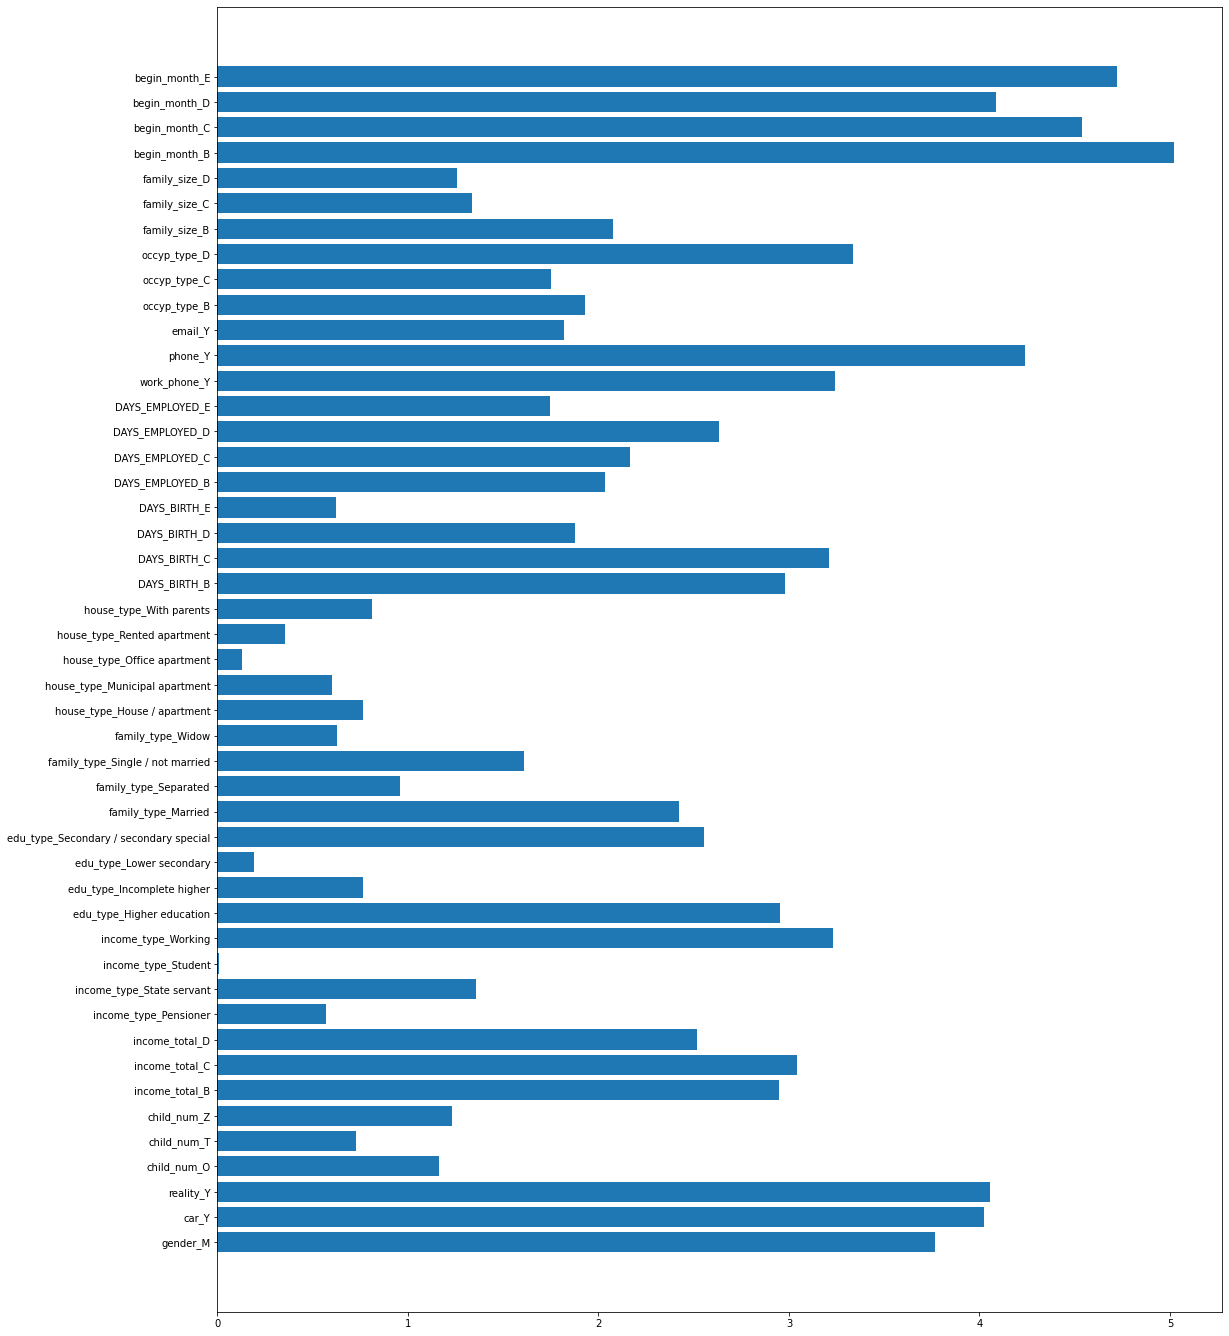

In [306]:
plt.figure(figsize=(18,24))
plt.barh(X_catdata.columns, cat_pred.get_feature_importance())

In [281]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)
    outcomes=[]
    sub=np.zeros((X_cattest.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(X_catdata, y_catdata)):
        X_train, X_val = X_catdata.iloc[train_index], X_catdata.iloc[val_index]
        y_train, y_val = y_catdata.iloc[train_index], y_catdata.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(X_cattest)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_pred)

0:	learn: 1.0520146	total: 8.1ms	remaining: 4.28s
1:	learn: 1.0157963	total: 24.8ms	remaining: 6.56s
2:	learn: 0.9881628	total: 36.6ms	remaining: 6.44s
3:	learn: 0.9657729	total: 57ms	remaining: 7.49s
4:	learn: 0.9481423	total: 104ms	remaining: 10.9s
5:	learn: 0.9319669	total: 119ms	remaining: 10.4s
6:	learn: 0.9208849	total: 125ms	remaining: 9.3s
7:	learn: 0.9115612	total: 164ms	remaining: 10.7s
8:	learn: 0.9037887	total: 179ms	remaining: 10.3s
9:	learn: 0.8973008	total: 213ms	remaining: 11.1s
10:	learn: 0.8919591	total: 227ms	remaining: 10.7s
11:	learn: 0.8807469	total: 239ms	remaining: 10.3s
12:	learn: 0.8719127	total: 255ms	remaining: 10.1s
13:	learn: 0.8679616	total: 270ms	remaining: 9.95s
14:	learn: 0.8652325	total: 278ms	remaining: 9.54s
15:	learn: 0.8620281	total: 287ms	remaining: 9.23s
16:	learn: 0.8597593	total: 297ms	remaining: 8.96s
17:	learn: 0.8550220	total: 316ms	remaining: 8.99s
18:	learn: 0.8536769	total: 323ms	remaining: 8.68s
19:	learn: 0.8500318	total: 359ms	remaini

In [289]:
submission = pd.read_csv('../Data/sample_submission.csv')

In [290]:
submission.loc[:,1:] = my_submission

In [292]:
submission.to_csv('../Data/Catboost_4.csv',index=False)